# Twitter US Airline Sentiment Analysis

#### Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").
#### Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has several columns but we will focus on :
    - airline_sentiment  (dependant variable)
    - text (input text / tweets)
#### Objective:
Create a Classifier model that can distingush between Positive, neutral and negative sentiment, using the techniques learnt as a part of the course.

### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)


In [1]:
# Import necessary NLP preprocessing and common libraries
import nltk, string, unicodedata, re
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet 
from nltk.stem import  WordNetLemmatizer
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset.
df = pd.read_csv('tweets.csv')

In [3]:
df.shape # 15 variables, 14640 datapoints

(14640, 15)

In [4]:
df.dtypes # Undestanding the types of the columns

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [5]:
df.describe(include='all').transpose() # Obtaining description of variables, to understand the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


Only 4 columns are numeric the rest (11) are categoric or text
As per the problem statement, we will use only two variables: the text of the tweets and the sentiment, to be able to train the model(s)

In [6]:
df.head() # visualizing the firt 5 rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


AxesSubplot(0.125,0.125;0.775x0.755)


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

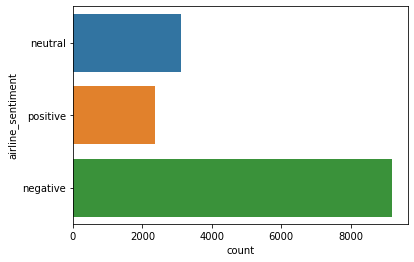

In [7]:
# Taking a look at the output variable "airline_sentiment" to see if it is imbalanced
y = df["airline_sentiment"] # array for ploting 
print(sns.countplot(y=df['airline_sentiment']))
df.airline_sentiment.value_counts()

The dependant variable is not perfectly balanced, but we can work with it as it is.

### 2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.


In [8]:
df2=df.copy(deep=True)  #  Making a working copy of the data set

In [9]:
# Analizing how many languages are present in the dataset  and how many tweets for each Language
from langdetect import detect  
df2['Language'] = ""
for i, desc in enumerate(df2['text']):
    try:
        df2['Language'][i] = detect(desc)
    except:
        df2['Language'][i] = 'unknown'
df2['Language'].value_counts()   

en    14457
fr       66
af       27
da       23
it       11
so        8
cy        7
nl        6
de        5
et        4
tr        4
ro        4
id        4
no        3
tl        3
es        3
fi        2
pt        1
pl        1
sv        1
Name: Language, dtype: int64

The count of tweets in other languages is less than 2%, so we can eliminate the other languages for accuracy.

In [10]:
# Making another copy and droping all columns except Sentiment, the tweet text (and the language)
df3=df2.drop(['airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location',
              'tweet_id', 'user_timezone'],axis=1)# droping all other columns except “text” and “airline_sentiment”

In [11]:
# Select only those tweets in English language - my objective is to increase accuracy , using only english libraries
df4=df3[df3["Language"]=='en'] # filtering only English tweets
df5=df4.drop(['Language'],axis=1)  # dropping all other input variables except the text of tweets and the sentiment

In [12]:
df5.shape 

(14457, 2)

In [13]:
df5.isnull().isnull().sum() # Check for null values

airline_sentiment    0
text                 0
dtype: int64

In [14]:
print(df5.head(5)) # printing first 5 rows of data before preprocessing

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


In [15]:
from wordcloud import WordCloud  # want to see the most used words
def generate_wordcloud(words, name, max_w=20):
    wc = WordCloud(width=400, height=400, max_font_size=40, min_font_size=6, max_words=max_w, colormap='Set1',collocations=True).generate(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common {} words of {}".format(max_w,name))
    plt.margins(x=0, y=0)
    plt.show()

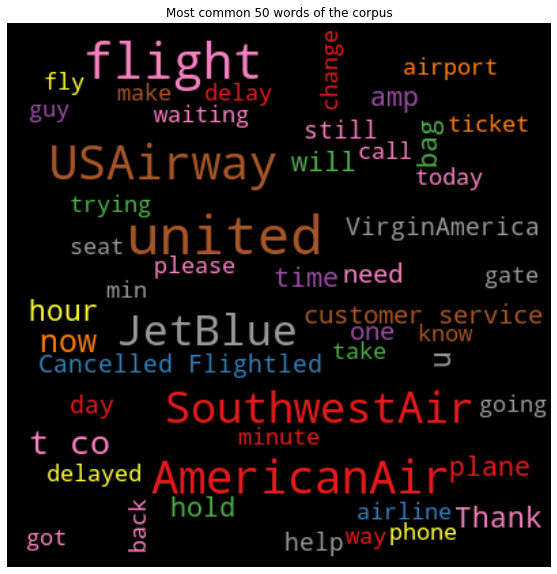

In [16]:
full_text = ' '.join(list(df5['text']))
generate_wordcloud(full_text, 'the corpus', 50)

Obviously the names of the airlines are predominant, but also the words Flight, Waiting, Cancelled, Delayed, 
curiously, the word 'Thank' is also predominant, so we expect the prediction to be as balanced as the dependant variable. We can also expect more tweets about United, than VirginAmerica airlines.

### 3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.


In [17]:
# Html tags removal:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df5['text'] = df5['text'].apply(lambda x: strip_html(x))
#df5.head()

In [18]:
# numbers (digits) removal:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text
df5['text'] = df5['text'].apply(lambda x: remove_numbers(x))
#df5.head()

In [19]:
pd.set_option('display.max_colwidth', None)
lemmatizer = WordNetLemmatizer() # I choose to do lemmatizing instead of stemming


In [20]:
# Proper noun removal:
for i, row in df5.iterrows(): 
    sentence=df5.at[i,'text']
    tagged_sentence = nltk.tag.pos_tag(sentence.split())
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    df5.at[i,'text']=(' '.join(edited_sentence)) 
df5.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [21]:
# Set my own custom stop-word's list: (to be used inside the following function)
stops = stopwords.words('english')  
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stops = list(set(stops) - set(customlist)) 

In [22]:
# This function helps to perform HTML tgs removal, tokenize, remove all charscters that are not letters
# are not letters (hence, removing numbers, special characters and punctuations). Also removes 
# stopwords in English. As we are separating the sentences in words, we are basically tokenizing again
# The input is a single string (a raw tweet), and the output is a single string (a preprocessed tweet)
def prepro(rawTweet, stpwrds):
    noHtml = BeautifulSoup(rawTweet).get_text() # a. Removing HTML
    tken = nltk.word_tokenize(noHtml)
    onlyLet = re.sub("[^a-zA-Z]", " ", str(tken)) # Removing all characters except letters
    lowers = onlyLet.lower().split()   # Transforming letters to lowercases                          
    noStops = [w for w in lowers if not w in stpwrds]   
    lemmas = [lemmatizer.lemmatize(word) for word in noStops]
    return( " ".join( lemmas ))  # Join the words back to the string

In [23]:
preproTweet = prepro( df5["text"][5], stops )  # testing the function
print (preproTweet)

virginamerica seriously would pay flight seat n playing really bad thing flying


In [24]:
#  Run prepro function over the entire dataset
df5=df5.reset_index(drop=True)
numTweets = df5["text"].size
cleanTweets = []
for i in range( 0, numTweets ):     # Looping thru the entire dataframe
    cleanTweets.append( prepro( (str(df5["text"][i])), stops ) )  # preprocessing each row

In [25]:
cleanTweets[:5]   # Printing first 5 rows of data after preprocessing

['virginamerica said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica n today mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face little recourse',
 'virginamerica really big bad thing']

### 4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer          #  opening vectorizing libraries
from sklearn.feature_extraction.text import TfidfVectorizer  

In [27]:
# Using Count-vectorizing
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 
trainTweets1 = vectorizer.fit_transform(cleanTweets)
trainTweets1 = trainTweets1.toarray() # output to 1st set of data

In [28]:
print (trainTweets1.shape)

(14457, 10000)


In [29]:
# TF-IDF Vectorizing 
vectorizer = TfidfVectorizer()
trainTweets2 = vectorizer.fit_transform(cleanTweets)  # Output to '2nd set of data'


In [30]:
print (trainTweets2.shape)

(14457, 10152)


In [31]:
# Onehot encoding of target variable: Negative = [1,0,0], Neutral = [0,1,0], Positive = [0,0,1]
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
intEnc_train = np.array(df5["airline_sentiment"]).reshape(len(df5["airline_sentiment"]), 1)
OHE_train = onehot_encoder.fit_transform(intEnc_train)

In [32]:
OHE_train  # displaying how the dependant variable(s) look now:

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [33]:
# importing additional libraries for preparing the data and to run clasifier model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [34]:
# Spliting train and test data for neural network using Countvectorizing data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(trainTweets1, # all 
                                                  OHE_train, 
                                                  test_size=0.2, 
                                                  random_state=33)


In [35]:
print('Training Shapes: X1_train=',X1_train.shape,' y1_train = ',y1_train.shape)
print('Test Shapes: X1_test=',X1_test.shape,' y1_test = ',y1_test.shape)

Training Shapes: X1_train= (11565, 10000)  y1_train =  (11565, 3)
Test Shapes: X1_test= (2892, 10000)  y1_test =  (2892, 3)


In [36]:
# Spliting train and test data for neural network using TF-IDF vectorizing data
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(trainTweets2, 
                                                  OHE_train, 
                                                  test_size=0.2, 
                                                  random_state=33)

In [37]:
print('Training Shapes: X2_train=',X2_train.shape,' y2_train = ',y2_train.shape)
print('Test Shapes: X2_test=',X2_test.shape,' y2_test = ',y2_test.shape)

Training Shapes: X2_train= (11565, 10152)  y2_train =  (11565, 3)
Test Shapes: X2_test= (2892, 10152)  y2_test =  (2892, 3)


### 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)


#### I will compare : 
    - Random Forest  using CountVectorize data 
    - Random Forest  using tfidfVectorize data
    - Neural Network using CountVectorize data 
    - Neural Network using tfidfVectorize data

In [38]:
# Run a random forest model with trainTweets1 , which is the Countvectorizer data:
ranfrst = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 10) 
ModForest1 = ranfrst.fit( trainTweets1, df5["airline_sentiment"] )
modelScore= ModForest1.score( trainTweets1, df5["airline_sentiment"])
print(modelScore)
modelCVscore= np.mean(cross_val_score(ModForest1,trainTweets1,df5["airline_sentiment"],cv=10))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


0.9783495884346683


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 o

In [39]:
modelCVscore

0.685966632686758

In [40]:
# Creating a results dataframe so we can compare models
resultsDf = pd.DataFrame({'Model':['Random forest using CountVectorize data'], 'Train Accuracy': modelScore,'Test Accuracy': modelCVscore})
resultsDf 
# Note: it is not test accuracy, it is crosvalidation accuracy, but put in same columns in results dataframe for comparison

,Model,Train Accuracy,Test Accuracy
0,Random forest using CountVectorize data,0.97835,0.685967


In [41]:
# runing random forest with TF-DIF vectorized data
ranfrst = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
ModForest1 = ranfrst.fit( trainTweets2, df5["airline_sentiment"] )
modelScore= ModForest1.score( trainTweets2, df5["airline_sentiment"])
print(modelScore)
modelCVscore=np.mean(cross_val_score(ModForest1,trainTweets2,df5["airline_sentiment"],cv=10, verbose=0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


0.9910078162827696


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]:

In [42]:
tempResultsDf = pd.DataFrame({'Model':['Random forest using TF-IDF Vectorize data'], 'Train Accuracy': modelScore,'Test Accuracy': modelCVscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf # updating the results dataframe

,Model,Train Accuracy,Test Accuracy
0,Random forest using CountVectorize data,0.978350,0.685967
0,Random forest using TF-IDF Vectorize data,0.991008,0.707821


TF-IDF vectorizing yields slightly better results

In [43]:
#  Adding more libraries to be able to run the Artificial Neural Network
import tensorflow as tf     # Import Tensorflow to create the Neural Network model
print(tf.__version__)
# Import additional libraries:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Activation
from tensorflow.keras.metrics import Recall, Accuracy
from sklearn.metrics import (accuracy_score, f1_score, recall_score, roc_auc_score, )
from tensorflow.keras import optimizers
from tensorflow.keras import utils

2.0.0


In [44]:
# First pass of the Neural Network for the CountVectorized data
model = Sequential()  
model.add(Dense(50, activation='relu', input_dim=X1_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.002,),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X1_train, y1_train , batch_size = 15000, epochs = 60, verbose=0)   # Run the Network

In [45]:
RTR= model.evaluate(X1_train, y1_train,verbose=0)  # Evaluate on train set
RTS= model.evaluate(X1_test, y1_test,verbose=0) # Evaluate on test set
tempResultsDf = pd.DataFrame({'Model':['DNeural Network using CountVectorize data'], 'Train Accuracy': RTR[1],'Test Accuracy': RTS[1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf  # updating the results dataframe

,Model,Train Accuracy,Test Accuracy
0,Random forest using CountVectorize data,0.978350,0.685967
0,Random forest using TF-IDF Vectorize data,0.991008,0.707821
0,DNeural Network using CountVectorize data,0.948292,0.768326


With Neural Network we get better results and less overfit

In [46]:
# second pass for the TF-IDF vectorized data
model = Sequential()
model.add(Dense(50, activation='relu',  input_dim=X2_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.002,),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X2_train, y2_train , batch_size = 15000, epochs = 60, verbose=0)   # Run the Network

In [47]:
RTR= model.evaluate(X2_train, y2_train,verbose=0)  # Evaluate on train set
RTS= model.evaluate(X2_test, y2_test,verbose=0)  # Evaluate on test set
tempResultsDf = pd.DataFrame({'Model':['DNeural Network using TF-IDFVectorize data'], 'Train Accuracy': RTR[1],'Test Accuracy': RTS[1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])  # updating the results dataframe

### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

In [48]:
# obtaining final Results df:
resultsDf

,Model,Train Accuracy,Test Accuracy
0,Random forest using CountVectorize data,0.978350,0.685967
0,Random forest using TF-IDF Vectorize data,0.991008,0.707821
0,DNeural Network using CountVectorize data,0.948292,0.768326
0,DNeural Network using TF-IDFVectorize data,0.936360,0.765906


#### CONCLUSION: 
Preprocessing do enables the Natural Language processing, doing the cleanning and preparation of the sentenses by removing html tags, special characters, numbers, stopwords, tokenization, convertion to lower case and (in this case) lemmatizing or stemming is fast and somehow standard. Pre-processing standarizes the data, although we need to be carefull not to delete some important words, and linguistics features. In my case preprocesing also removed tweets that were not in english, but we could work with several languages instead. Unbalanced data is also an issue, but sampling technics could improve the outcome. One important step not to forget, is to get the data in the form of a list, as the vectorization cannot be used directly from a dataframe column. CountVectorizing vs. TF-IDF Vectorizing selection will depend on the particular data and the model to be used: the difference was noticeable for the Randon Forest model, but not significant among neural networks, maybe different results could be obtained with RNN, at least for this dataset. Selecting the right type of model will depend on the size of the text and the computing power available.

Main takeaway is that: NLP with Random Forest models, is not necessarily faster than neural networks, but they are easier to implement and can yield similar results (lower though not too distant) to those with the ANN.
